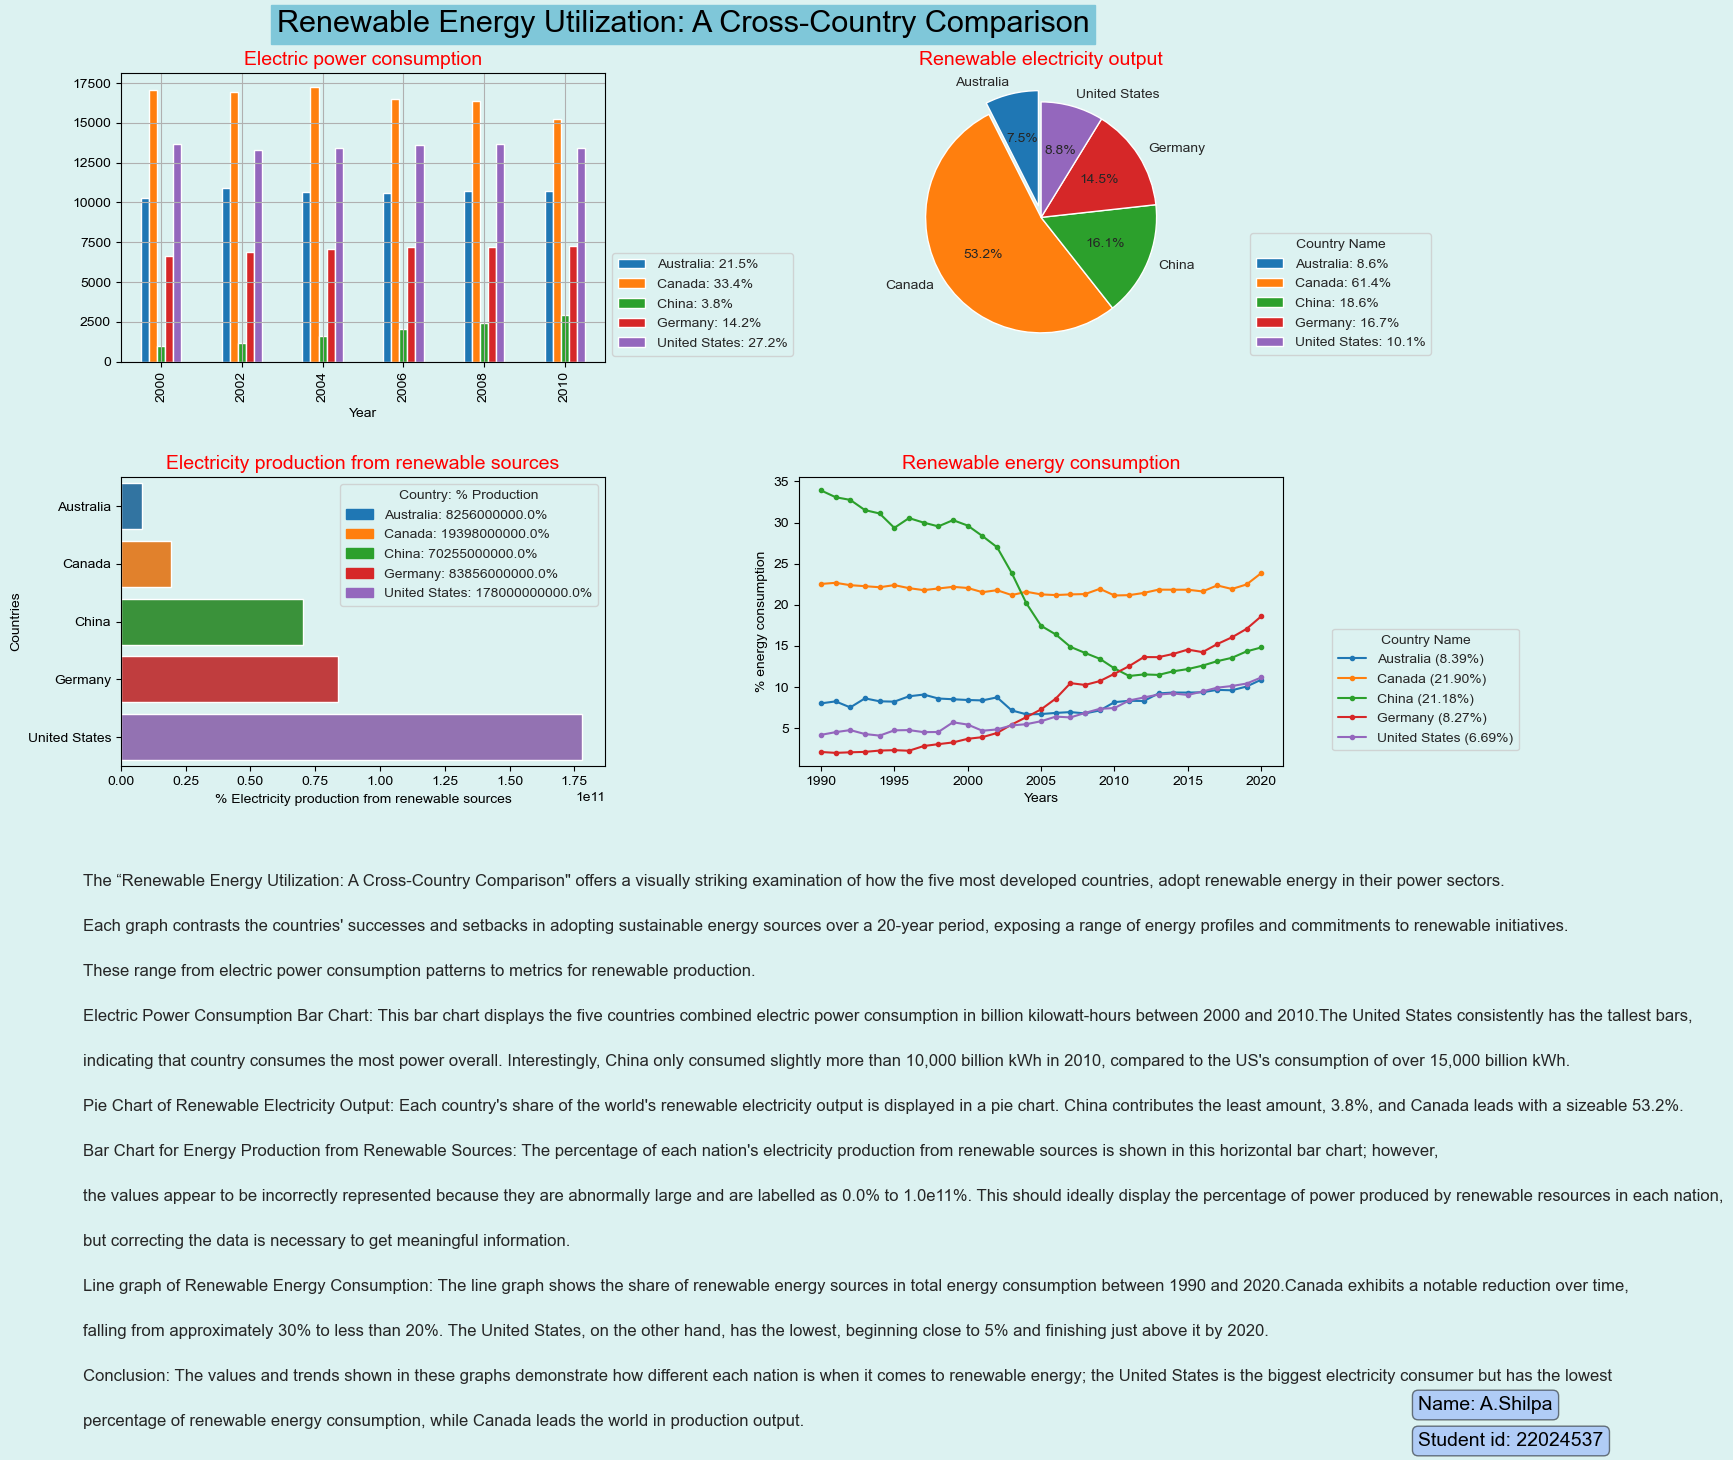

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Read and prepare data from the file
def read_and_prepare_data(file_path):
    data = pd.read_csv(file_path)
    data_melted = data.melt(id_vars=['Indicator Name', 'Country Name'], var_name='Year', value_name='Value')
    data_melted['Year'] = data_melted['Year'].astype(int)
    return data_melted

# Prepare data for plotting
def prepare_data(data, indicator, countries, year=None, reset_index=False):
    data_filtered = data[(data['Country Name'].isin(countries)) & (data['Indicator Name'] == indicator)]
    if year:
        data_filtered = data_filtered[data_filtered['Year'] == year]
    data_pivot = data_filtered.pivot(index='Year', columns='Country Name', values='Value')
    if reset_index:
        data_pivot = data_pivot.reset_index()
    return data_pivot

# Plotting functions for each type of plot
def plot_electric_power_consumption(ax, df, colors):
    selected_years = [year for year in range(2000, 2011, 2)]
    df_selected = df.loc[selected_years]
    df_selected.plot(kind='bar', ax=ax, color=colors)
    ax.set_title('Electric power consumption', fontsize=14, color='red')
    ax.set_facecolor('#DCF2F1')
    total_consumption = df_selected.sum().sum()
    percentages = df_selected.sum() / total_consumption * 100
    legend_labels = [f"{country}: {percent:.1f}%" for country, percent in zip(df_selected.columns, percentages)]
    ax.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.4), facecolor='#DCF2F1')

def plot_renewable_electricity_output(ax, df, colors):
    values = df.loc[2010].tolist()
    labels = df.columns.tolist()
    explode = (0.1, 0, 0, 0, 0)
    wedges, texts, autotexts = ax.pie(values, labels=labels, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
    ax.set_title('Renewable electricity output', fontsize=14, color='red')
    ax.set_facecolor('#DCF2F1')
    legend_labels = [f"{label}: {value:.1f}%" for label, value in zip(labels, values)]
    ax.legend(wedges, legend_labels, title='Country Name', loc='lower left', bbox_to_anchor=(1.2, 0, 1, 1), facecolor='#DCF2F1')

def plot_electricity_production(ax, df, colors):
    if 'Year' in df.columns:
        df = df.drop(columns='Year')
    barplot = sns.barplot(x=df.iloc[0], y=df.columns, ax=ax, palette=colors)
    ax.set(xlabel='% Electricity production from renewable sources', ylabel='Countries')
    ax.set_facecolor('#DCF2F1')
    ax.set_title('Electricity production from renewable sources', fontsize=14, color='red')
    legend_patches = [mpatches.Patch(color=color, label=f"{country}: {value:.1f}%" ) 
                      for country, value, color in zip(df.columns, df.iloc[0], colors)]
    ax.legend(handles=legend_patches, title='Country: % Production', loc='upper right', bbox_to_anchor=(1, 1), facecolor='#DCF2F1')
    
def plot_energy_consumption(ax, df, data_melted, colors):
    indicator_name = 'Renewable energy consumption (% of total final energy consumption)'
    if 'Year' in df.columns:
        df = df.set_index('Year')
    if not df.empty:
        for i, country in enumerate(df.columns):
            ax.plot(df.index, df[country], label=f"{country} ({df[country].mean():.2f}%)", color=colors[i], marker='.')
        ax.set_title('Renewable energy consumption', fontsize=14, color='red')
        ax.set_xlabel('Years')
        ax.set_ylabel('% energy consumption')
        ax.set_facecolor('#DCF2F1')
        ax.legend(title='Country Name', loc='upper right', bbox_to_anchor=(1.5, 0.5), facecolor='#DCF2F1')
    else:
        ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', fontsize=12)
        ax.set_facecolor('#DCF2F1')
        ax.set_title('Renewable energy consumption', fontsize=14)

def generate_plots(df_electric_power_consumption, df_renewable_electricity_output, df_electricity_production, df_energy_consumption, colors, report_text):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9), gridspec_kw={'hspace': 0.4, 'wspace': 0.4}, facecolor='#DCF2F1')
    sns.set_style("whitegrid")
    plot_electric_power_consumption(axes[0, 0], df_electric_power_consumption, colors)
    plot_renewable_electricity_output(axes[0, 1], df_renewable_electricity_output, colors)
    plot_electricity_production(axes[1, 0], df_electricity_production, colors)
    plot_energy_consumption(axes[1, 1], df_energy_consumption, data_melted, colors)

    # Displaying the report text
    split_text = report_text.split('\n')
    text_y_position = -0.01
    for line in split_text:
        fig.text(0.1, text_y_position, line, ha='left', va='top', fontsize=12)
        text_y_position -= 0.05

    # Stylish box for author information
    author_box = dict(boxstyle='round', facecolor='#86A7FC', alpha=0.5, edgecolor='black')
    plt.text(0.99, -0.61, "Name: A.Shilpa", transform=fig.transFigure, ha="left", va="bottom", fontsize=14, color='black', bbox=author_box)
    plt.text(0.99, -0.65, "Student id: 22024537", transform=fig.transFigure, ha="left", va="bottom", fontsize=14, color='black', bbox=author_box)

    plt.suptitle("Renewable Energy Utilization: A Cross-Country Comparison", fontsize=22, y=0.95, color='black', ha='center', backgroundcolor='#7FC7D9')

# Define the report text
report_text = """The “Renewable Energy Utilization: A Cross-Country Comparison" offers a visually striking examination of how the five most developed countries, adopt renewable energy in their power sectors.
Each graph contrasts the countries' successes and setbacks in adopting sustainable energy sources over a 20-year period, exposing a range of energy profiles and commitments to renewable initiatives. 
These range from electric power consumption patterns to metrics for renewable production.
Electric Power Consumption Bar Chart: This bar chart displays the five countries combined electric power consumption in billion kilowatt-hours between 2000 and 2010.The United States consistently has the tallest bars,
indicating that country consumes the most power overall. Interestingly, China only consumed slightly more than 10,000 billion kWh in 2010, compared to the US's consumption of over 15,000 billion kWh.
Pie Chart of Renewable Electricity Output: Each country's share of the world's renewable electricity output is displayed in a pie chart. China contributes the least amount, 3.8%, and Canada leads with a sizeable 53.2%.
Bar Chart for Energy Production from Renewable Sources: The percentage of each nation's electricity production from renewable sources is shown in this horizontal bar chart; however, 
the values appear to be incorrectly represented because they are abnormally large and are labelled as 0.0% to 1.0e11%. This should ideally display the percentage of power produced by renewable resources in each nation,
but correcting the data is necessary to get meaningful information.
Line graph of Renewable Energy Consumption: The line graph shows the share of renewable energy sources in total energy consumption between 1990 and 2020.Canada exhibits a notable reduction over time,
falling from approximately 30% to less than 20%. The United States, on the other hand, has the lowest, beginning close to 5% and finishing just above it by 2020.
Conclusion: The values and trends shown in these graphs demonstrate how different each nation is when it comes to renewable energy; the United States is the biggest electricity consumer but has the lowest 
percentage of renewable energy consumption, while Canada leads the world in production output.
"""
# Main execution code
file_path = "C:\\Users\\User\\OneDrive\\Desktop\\ASD1 practical\\ads assignment 2\\world-data.csv"
data_melted = read_and_prepare_data(file_path)
country_list = ['Australia', 'Canada', 'China', 'Germany', 'United States']
df_electric_power_consumption = prepare_data(data_melted, 'Electric power consumption (kWh per capita)', country_list)
df_renewable_electricity_output = prepare_data(data_melted, 'Renewable electricity output (% of total electricity output)', country_list, year=2010)
df_electricity_production = prepare_data(data_melted, 'Electricity production from renewable sources, excluding hydroelectric (kWh)', country_list, year=2010, reset_index=True)
df_energy_consumption = prepare_data(data_melted, 'Renewable energy consumption (% of total final energy consumption)', country_list, reset_index=True)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Generate the plots
generate_plots(df_electric_power_consumption, df_renewable_electricity_output, df_electricity_production, df_energy_consumption, colors, report_text)

# Save the figure
plt.savefig("22024537.png", dpi=300)
